# please upvote if you like this notebook

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2

In [4]:
import os

train_dir='../input/10-monkey-species/training/training'

validation_dir='../input/10-monkey-species/validation/validation'

print("TRAINING SET",len(os.listdir(train_dir)))
print("VALIDATION SET",len(os.listdir(validation_dir)))


TRAINING SET 10
VALIDATION SET 10


In [5]:
image=cv2.imread('../input/10-monkey-species/training/training/n0/n0018.jpg')
print(image.shape)

(367, 550, 3)


In [27]:
def plotimage(plt):
    img_size=150
    plt.figure(figsize=(18,20))
    ctr=0
    for expression in os.listdir("../input/10-monkey-species/training/training"):
        for i in range(0,10):
            ctr += 1
            plt.subplot(6,6,ctr)
            img = load_img("../input/10-monkey-species/training/training/" + expression + "/" +os.listdir("../input/10-monkey-species/training/training/" + expression)[i], target_size=(img_size, img_size))
            plt.imshow(img)
            plt.title(expression)

    plt.tight_layout()
    return plt

ValueError: num must be 1 <= num <= 36, not 37

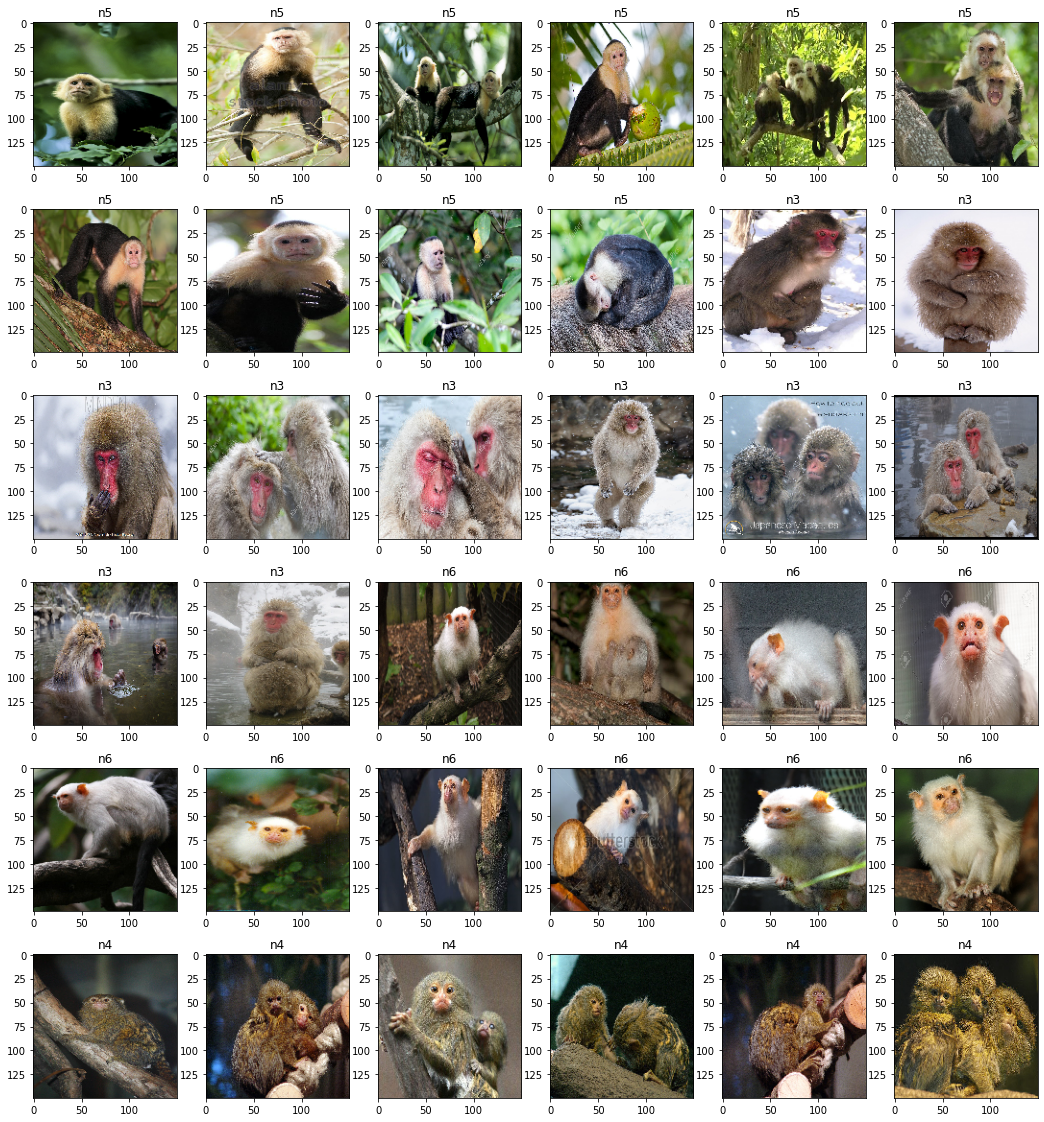

In [28]:
plotimage(plt).show()

In [29]:
 from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(rescale=1.0/255.0,
                           
                            rotation_range=20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip=True)
validation_gen=ImageDataGenerator(rescale=1.0/255.0)

In [30]:
trainDatagen=train_gen.flow_from_directory(train_dir,
                                          target_size=(150,150),
                                           batch_size=100,
                                           class_mode='categorical')
valDatagen=validation_gen.flow_from_directory(validation_dir,
                                              target_size=(150,150),
                                           batch_size=20,
                                           class_mode='categorical')

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [31]:
def create_model(input_shape):
   
    base_model = tf.keras.applications.Xception(input_shape = input_shape,
                       include_top = False)
                      

    # we do not have to train all of the layers
    for layer in base_model.layers:
        layer.trainable = False
        
    x = tf.keras.layers.Flatten()(base_model.output)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(10, activation = 'softmax')(x)
    
    return tf.keras.models.Model(base_model.input,x)
model = create_model((150,150,3))
model.summary()

83689472/83683744 [==============================] - 1s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
______________________

In [32]:
model.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.SGD(lr=0.005),
             metrics=['accuracy'])

In [33]:
class mycallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epochs,logs={}):
        if(logs.get('accuracy')>0.99):
            self.model.stop_training=True

In [34]:
callbacks=mycallbacks()
history=model.fit_generator(trainDatagen,validation_data=valDatagen,epochs=20,verbose=1,callbacks=[callbacks])

Epoch 1/20
11/11 [==============================] - 37s 3s/step - loss: 1.5322 - accuracy: 0.5328 - val_loss: 0.5465 - val_accuracy: 0.8382
Epoch 2/20
11/11 [==============================] - 35s 3s/step - loss: 0.7438 - accuracy: 0.7614 - val_loss: 0.3211 - val_accuracy: 0.8971
Epoch 3/20
11/11 [==============================] - 33s 3s/step - loss: 0.5629 - accuracy: 0.8169 - val_loss: 0.3116 - val_accuracy: 0.9044
Epoch 4/20
11/11 [==============================] - 33s 3s/step - loss: 0.5105 - accuracy: 0.8342 - val_loss: 0.2790 - val_accuracy: 0.9228
Epoch 5/20
11/11 [==============================] - 34s 3s/step - loss: 0.4639 - accuracy: 0.8470 - val_loss: 0.2547 - val_accuracy: 0.9228
Epoch 6/20
11/11 [==============================] - 33s 3s/step - loss: 0.4306 - accuracy: 0.8616 - val_loss: 0.2630 - val_accuracy: 0.9265
Epoch 7/20
11/11 [==============================] - 33s 3s/step - loss: 0.4172 - accuracy: 0.8670 - val_loss: 0.2472 - val_accuracy: 0.9191
Epoch 8/20
11/11 [==

In [35]:
monkey= {'n0':'mantled_howler','n1':'patas_monkey',
      'n2':'bald_uakari','n3':'japanese_macaque',
      'n4':'pygmy_marmoset','n5':'white_headed_capuchin',
      'n6':'silvery_marmoset','n7':'common_squirrel_monkey',
      'n8':'black_headed_night_monkey','n9':'nilgiri_langur'}
read_file=pd.read_csv('../input/10-monkey-species/monkey_labels.txt')
read_file.head()


,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26


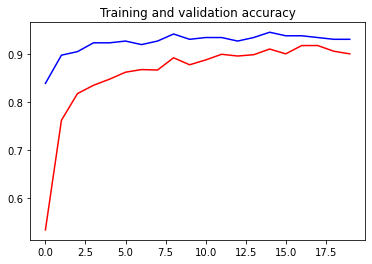

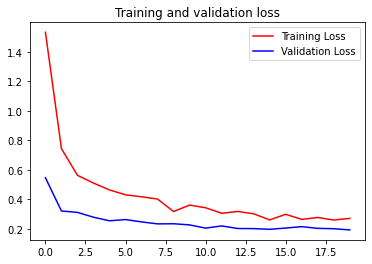

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
